1			3.094845771789551
2			3.304518938064575
3			2.5564358234405518
4			3.5066380500793457
5			2.8131754398345947
6			3.108837842941284
7			3.4571754932403564
8			2.852748155593872
9			6.040926933288574
10			4.841906547546387
11			2.9555084705352783
12			3.0947182178497314
13			3.027449607849121
14			2.9811506271362305
15			3.0284996032714844
16			35.17403435707092


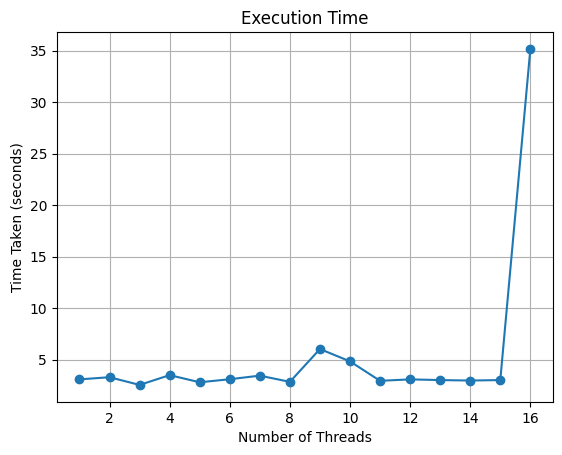

In [12]:
import numpy as np
import time
import threading
import multiprocessing
import matplotlib.pyplot as plt

def matrix_multiply(A, B, result, start_row, end_row):
    for i in range(start_row, end_row):
        result[i] = np.dot(A[i], B)

def multiply_with_threads(A, B, num_threads):
    result = [None] * len(A)
    threads = []
    rows_per_thread = len(A) // num_threads

    for i in range(num_threads):
        start_row = i * rows_per_thread
        end_row = start_row + rows_per_thread if i < num_threads - 1 else len(A)
        thread = threading.Thread(target=matrix_multiply, args=(A, B, result, start_row, end_row))
        threads.append(thread)
        thread.start()

    for thread in threads:
        thread.join()

    return result

def main():
    matrix_size = 1000
    num_matrices = 100
    num_cpus = multiprocessing.cpu_count()  # Get the number of CPUs dynamically
    max_threads = num_cpus * 2  # Set maximum threads to twice the number of CPUs

    # Generate random matrices
    matrices = [np.random.rand(matrix_size, matrix_size) for _ in range(num_matrices)]
    constant_matrix = np.random.rand(matrix_size, matrix_size)

    # Multiply matrices with increasing number of threads
    execution_times = []
    for num_threads in range(1, max_threads + 1):
        start_time = time.time()
        _ = multiply_with_threads(matrices, constant_matrix, num_threads)
        end_time = time.time()
        elapsed_time = end_time - start_time
        execution_times.append(elapsed_time)
        print(f"{num_threads}\t\t\t{elapsed_time}")

    # Plotting the graph
    plt.plot(range(1, max_threads + 1), execution_times, marker='o')
    plt.title("Execution Time")
    plt.xlabel("Number of Threads")
    plt.ylabel("Time Taken (seconds)")
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()


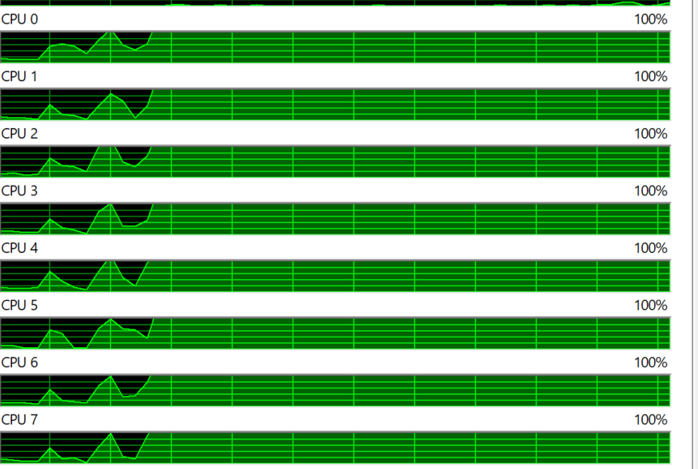